In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# install SentenceTransformer
!pip install -U sentence-transformers
!pip install lime

In [ ]:
# import some librarys
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import KFold
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
dataSet1 = pd.read_csv('/content/drive/MyDrive/Abschlussarbeit/Datasets/Dataset/article_and_tweets_with_cleaning.csv', sep = ",")
dataSet2 = pd.read_csv('/content/drive/MyDrive/Abschlussarbeit/Datasets/Dataset/article_and_tweets_without_cleaning.csv', sep = ",")
dataSet3 = pd.read_csv('/content/drive/MyDrive/Abschlussarbeit/Datasets/Dataset/tweets_with_cleaning.csv', sep = ",")
dataSet4 = pd.read_csv('/content/drive/MyDrive/Abschlussarbeit/Datasets/Dataset/tweets_without_cleaning.csv', sep = ",")
dataSet_array = [dataSet1, dataSet2, dataSet3, dataSet4]

In [ ]:
# creat the SentenceTransformer model for encode the texts
model = SentenceTransformer('all-MiniLM-L6-v2')

In [6]:
# polt method
def plot_graphs(score_list, k_range, maxScore, max_k):
  fig = plt.figure()
  plt.xlabel("k")
  plt.ylabel("score")
  plt.title('find the best k')
  arrayX =[0, max_k]
  arrayY =[0.0, maxScore]
  arrayX_cons = [maxScore, maxScore]
  arrayY_cons = [max_k, max_k]
  ax = fig.add_subplot(111)
  line, = ax.plot(k_range, score_list)

  ax.annotate('best k', xy=(max_k, maxScore), xytext=(max_k+2, maxScore+1),
              arrowprops=dict(facecolor='black', shrink=0.1),
             )
  ax.plot(arrayY_cons, arrayY)
  ax.plot(arrayX, arrayX_cons)
  ax.get_lines()[1].set_color("black")
  ax.get_lines()[2].set_color("black")
  ax.set_ylim(min(score_list)-2,max(score_list)+2)
  plt.show()

In [7]:
# this method will find the best k for each split
def find_the_best_k(training_padded, training_labels, testing_padded, testing_labels):
  maxScore = 0
  result = 0
  k_range = list(range(1, 51))
  score_list = []
  for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(training_padded, training_labels)
    score = knn.score(testing_padded, testing_labels)
    score = score * 100
    score_list.append(score)
    if maxScore < score:
      maxScore = score
      result = k
  plot_graphs(score_list, k_range, maxScore, result)
  return result

------------------------------------------------------------
!!!!!  sub-experiment with KNN model number 1  !!!!!
!!!!!  dataset used is : article and tweets with cleaning  !!!!!
------------------------------------------------------------
             !!!!!  split number : 1  !!!!!
     In training: Counter({False: 9881, True: 9866})
     In testing: Counter({True: 1105, False: 1090})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


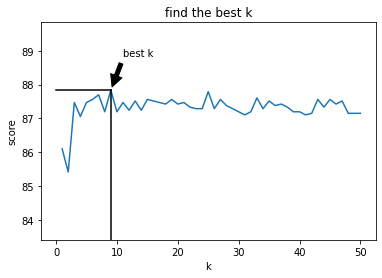

           The best k found: 9,  score = 0.8783599088838269


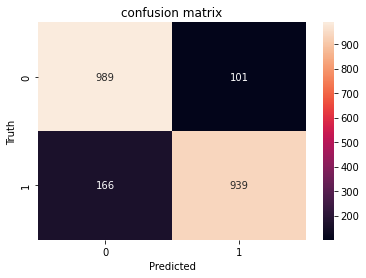

              precision    recall  f1-score   support

       False       0.86      0.91      0.88      1090
        True       0.90      0.85      0.88      1105

    accuracy                           0.88      2195
   macro avg       0.88      0.88      0.88      2195
weighted avg       0.88      0.88      0.88      2195

             !!!!!  split number : 2  !!!!!
     In training: Counter({False: 9892, True: 9855})
     In testing: Counter({True: 1116, False: 1079})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


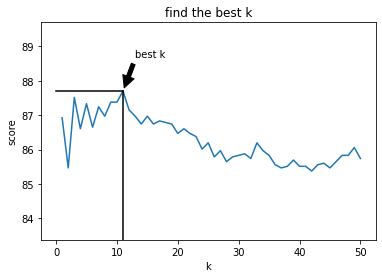

           The best k found: 11,  score = 0.876993166287016


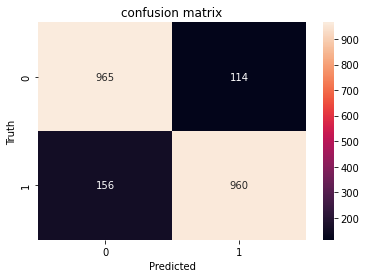

              precision    recall  f1-score   support

       False       0.86      0.89      0.88      1079
        True       0.89      0.86      0.88      1116

    accuracy                           0.88      2195
   macro avg       0.88      0.88      0.88      2195
weighted avg       0.88      0.88      0.88      2195

             !!!!!  split number : 3  !!!!!
     In training: Counter({True: 9891, False: 9857})
     In testing: Counter({False: 1114, True: 1080})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


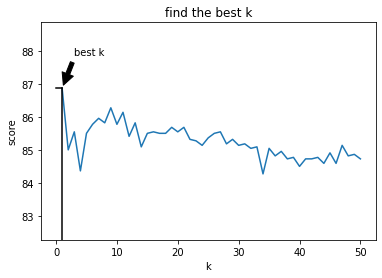

           The best k found: 1,  score = 0.8687329079307201


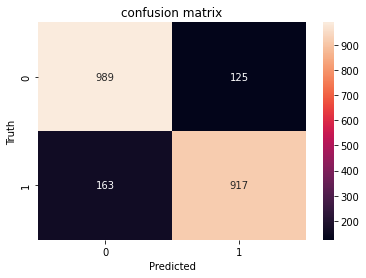

              precision    recall  f1-score   support

       False       0.86      0.89      0.87      1114
        True       0.88      0.85      0.86      1080

    accuracy                           0.87      2194
   macro avg       0.87      0.87      0.87      2194
weighted avg       0.87      0.87      0.87      2194

             !!!!!  split number : 4  !!!!!
     In training: Counter({True: 9884, False: 9864})
     In testing: Counter({False: 1107, True: 1087})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


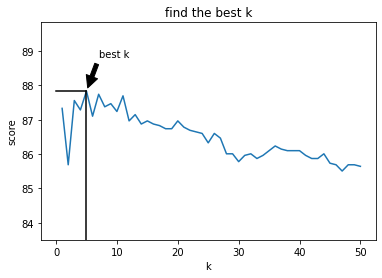

           The best k found: 5,  score = 0.8783044667274384


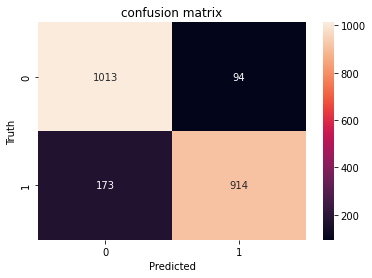

              precision    recall  f1-score   support

       False       0.85      0.92      0.88      1107
        True       0.91      0.84      0.87      1087

    accuracy                           0.88      2194
   macro avg       0.88      0.88      0.88      2194
weighted avg       0.88      0.88      0.88      2194

             !!!!!  split number : 5  !!!!!
     In training: Counter({False: 9904, True: 9844})
     In testing: Counter({True: 1127, False: 1067})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


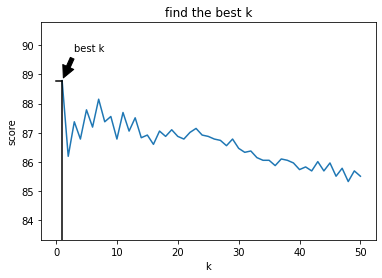

           The best k found: 1,  score = 0.8878760255241568


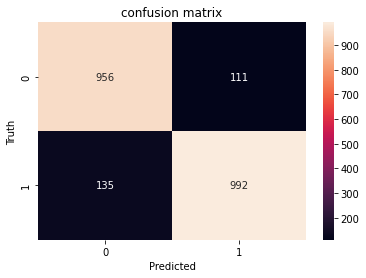

              precision    recall  f1-score   support

       False       0.88      0.90      0.89      1067
        True       0.90      0.88      0.89      1127

    accuracy                           0.89      2194
   macro avg       0.89      0.89      0.89      2194
weighted avg       0.89      0.89      0.89      2194

             !!!!!  split number : 6  !!!!!
     In training: Counter({False: 9885, True: 9863})
     In testing: Counter({True: 1108, False: 1086})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


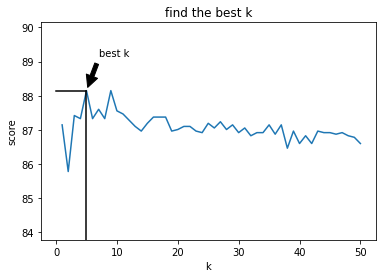

           The best k found: 5,  score = 0.8814949863263446


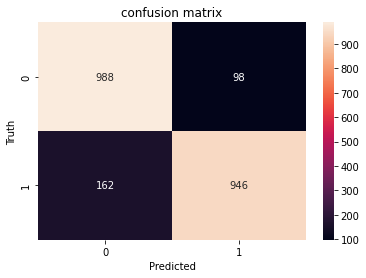

              precision    recall  f1-score   support

       False       0.86      0.91      0.88      1086
        True       0.91      0.85      0.88      1108

    accuracy                           0.88      2194
   macro avg       0.88      0.88      0.88      2194
weighted avg       0.88      0.88      0.88      2194

             !!!!!  split number : 7  !!!!!
     In training: Counter({True: 9886, False: 9862})
     In testing: Counter({False: 1109, True: 1085})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


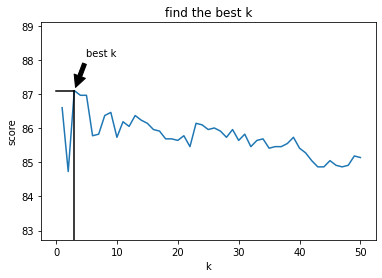

           The best k found: 3,  score = 0.8710118505013673


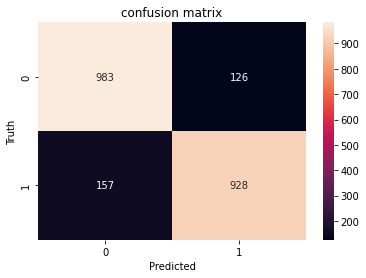

              precision    recall  f1-score   support

       False       0.86      0.89      0.87      1109
        True       0.88      0.86      0.87      1085

    accuracy                           0.87      2194
   macro avg       0.87      0.87      0.87      2194
weighted avg       0.87      0.87      0.87      2194

             !!!!!  split number : 8  !!!!!
     In training: Counter({False: 9887, True: 9861})
     In testing: Counter({True: 1110, False: 1084})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


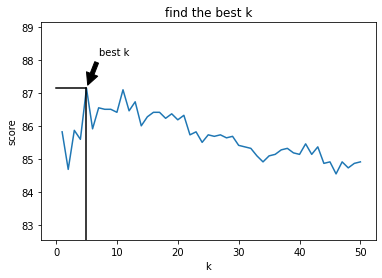

           The best k found: 5,  score = 0.8714676390154968


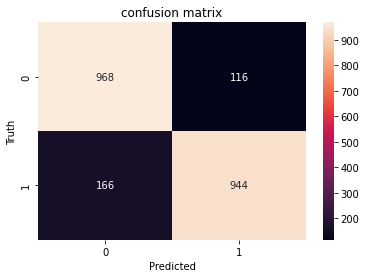

              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1084
        True       0.89      0.85      0.87      1110

    accuracy                           0.87      2194
   macro avg       0.87      0.87      0.87      2194
weighted avg       0.87      0.87      0.87      2194

             !!!!!  split number : 9  !!!!!
     In training: Counter({True: 9911, False: 9837})
     In testing: Counter({False: 1134, True: 1060})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


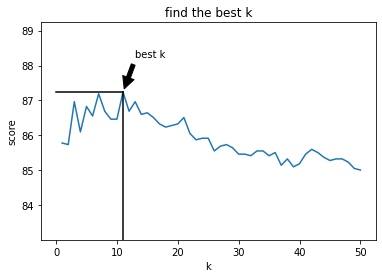

           The best k found: 11,  score = 0.8723792160437557


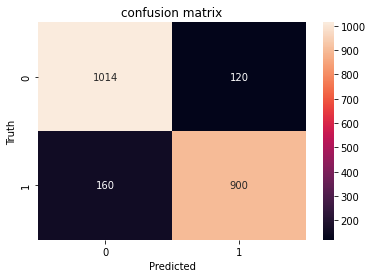

              precision    recall  f1-score   support

       False       0.86      0.89      0.88      1134
        True       0.88      0.85      0.87      1060

    accuracy                           0.87      2194
   macro avg       0.87      0.87      0.87      2194
weighted avg       0.87      0.87      0.87      2194

             !!!!!  split number : 10  !!!!!
     In training: Counter({True: 9878, False: 9870})
     In testing: Counter({False: 1101, True: 1093})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


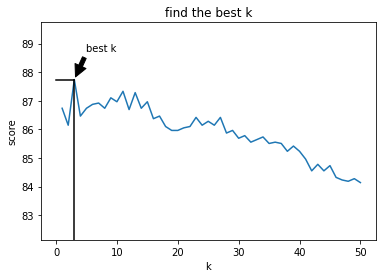

           The best k found: 3,  score = 0.8773928896991796


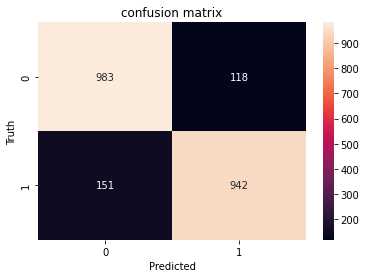

              precision    recall  f1-score   support

       False       0.87      0.89      0.88      1101
        True       0.89      0.86      0.88      1093

    accuracy                           0.88      2194
   macro avg       0.88      0.88      0.88      2194
weighted avg       0.88      0.88      0.88      2194

mean accuracy for this sub_experiment is 0.88
mean recall for this sub_experiment is 0.86
mean precision for this sub_experiment is 0.89
mean f1_score for this sub_experiment is 0.87
------------------------------------------------------------
!!!!!  sub-experiment with KNN model number 2  !!!!!
!!!!!  dataset used is : article and tweets without cleaning  !!!!!
------------------------------------------------------------
             !!!!!  split number : 1  !!!!!
     In training: Counter({True: 9896, False: 9853})
     In testing: Counter({False: 1119, True: 1076})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


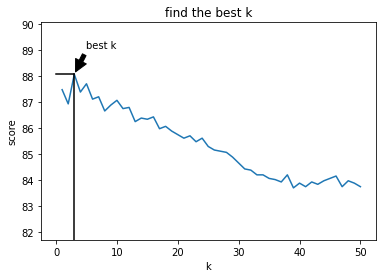

           The best k found: 3,  score = 0.8806378132118451


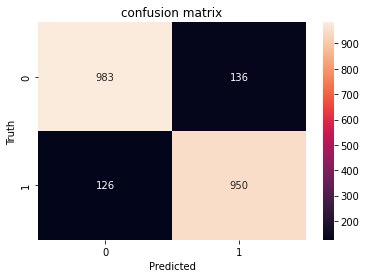

              precision    recall  f1-score   support

       False       0.89      0.88      0.88      1119
        True       0.87      0.88      0.88      1076

    accuracy                           0.88      2195
   macro avg       0.88      0.88      0.88      2195
weighted avg       0.88      0.88      0.88      2195

             !!!!!  split number : 2  !!!!!
     In training: Counter({True: 9885, False: 9864})
     In testing: Counter({False: 1108, True: 1087})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


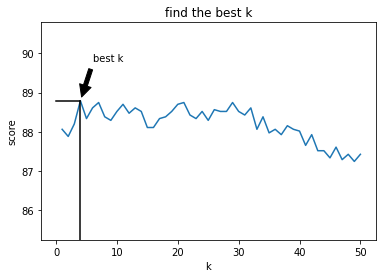

           The best k found: 4,  score = 0.8879271070615035


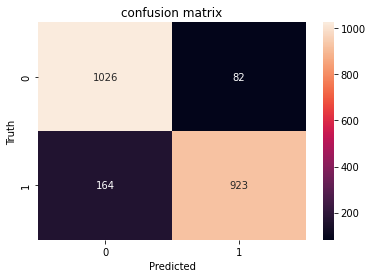

              precision    recall  f1-score   support

       False       0.86      0.93      0.89      1108
        True       0.92      0.85      0.88      1087

    accuracy                           0.89      2195
   macro avg       0.89      0.89      0.89      2195
weighted avg       0.89      0.89      0.89      2195

             !!!!!  split number : 3  !!!!!
     In training: Counter({False: 9886, True: 9863})
     In testing: Counter({True: 1109, False: 1086})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


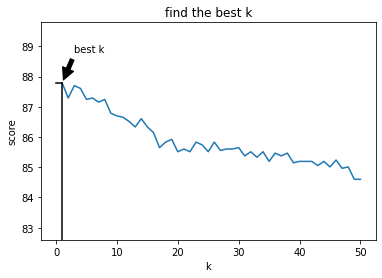

           The best k found: 1,  score = 0.8779043280182233


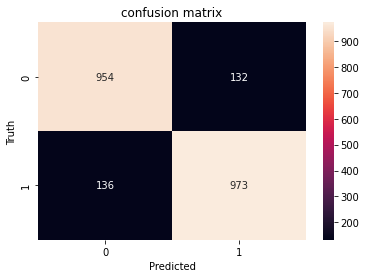

              precision    recall  f1-score   support

       False       0.88      0.88      0.88      1086
        True       0.88      0.88      0.88      1109

    accuracy                           0.88      2195
   macro avg       0.88      0.88      0.88      2195
weighted avg       0.88      0.88      0.88      2195

             !!!!!  split number : 4  !!!!!
     In training: Counter({False: 9889, True: 9860})
     In testing: Counter({True: 1112, False: 1083})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


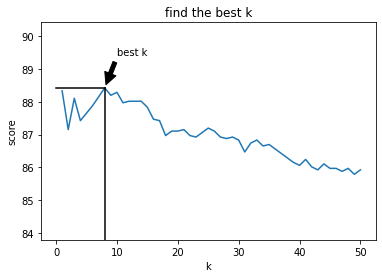

           The best k found: 8,  score = 0.8842824601366742


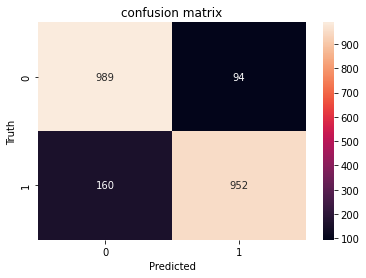

              precision    recall  f1-score   support

       False       0.86      0.91      0.89      1083
        True       0.91      0.86      0.88      1112

    accuracy                           0.88      2195
   macro avg       0.89      0.88      0.88      2195
weighted avg       0.89      0.88      0.88      2195

             !!!!!  split number : 5  !!!!!
     In training: Counter({True: 9894, False: 9856})
     In testing: Counter({False: 1116, True: 1078})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


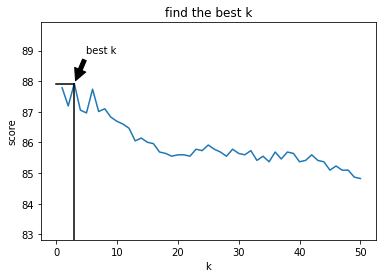

           The best k found: 3,  score = 0.8792160437556974


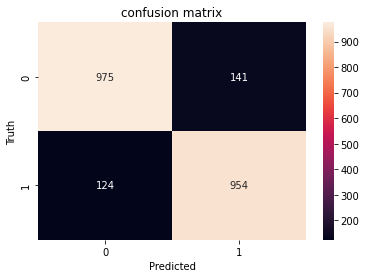

              precision    recall  f1-score   support

       False       0.89      0.87      0.88      1116
        True       0.87      0.88      0.88      1078

    accuracy                           0.88      2194
   macro avg       0.88      0.88      0.88      2194
weighted avg       0.88      0.88      0.88      2194

             !!!!!  split number : 6  !!!!!
     In training: Counter({False: 9935, True: 9815})
     In testing: Counter({True: 1157, False: 1037})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


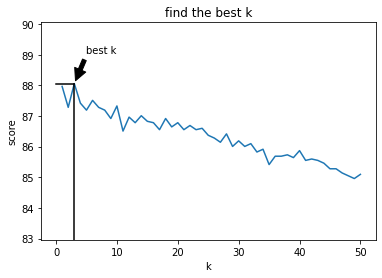

           The best k found: 3,  score = 0.8805834092980857


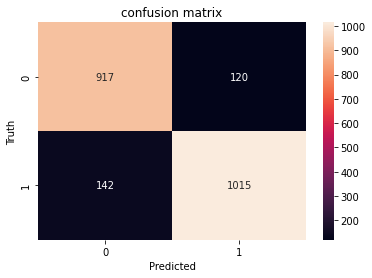

              precision    recall  f1-score   support

       False       0.87      0.88      0.88      1037
        True       0.89      0.88      0.89      1157

    accuracy                           0.88      2194
   macro avg       0.88      0.88      0.88      2194
weighted avg       0.88      0.88      0.88      2194

             !!!!!  split number : 7  !!!!!
     In training: Counter({True: 9927, False: 9823})
     In testing: Counter({False: 1149, True: 1045})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


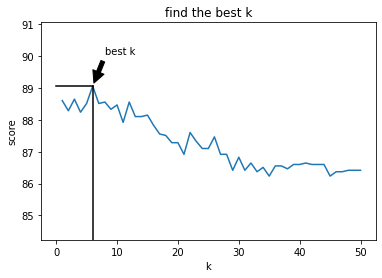

           The best k found: 6,  score = 0.8906107566089334


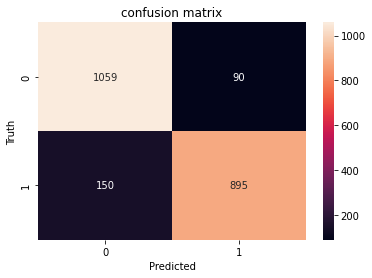

              precision    recall  f1-score   support

       False       0.88      0.92      0.90      1149
        True       0.91      0.86      0.88      1045

    accuracy                           0.89      2194
   macro avg       0.89      0.89      0.89      2194
weighted avg       0.89      0.89      0.89      2194

             !!!!!  split number : 8  !!!!!
     In training: Counter({True: 9903, False: 9847})
     In testing: Counter({False: 1125, True: 1069})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


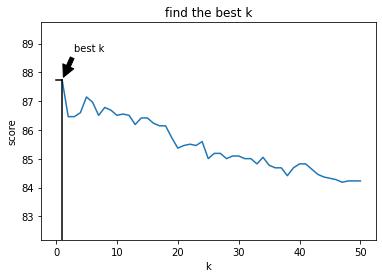

           The best k found: 1,  score = 0.8773928896991796


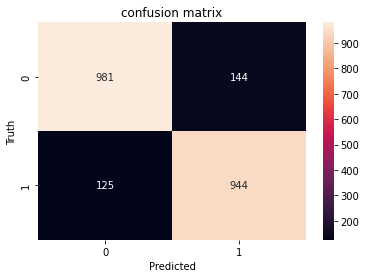

              precision    recall  f1-score   support

       False       0.89      0.87      0.88      1125
        True       0.87      0.88      0.88      1069

    accuracy                           0.88      2194
   macro avg       0.88      0.88      0.88      2194
weighted avg       0.88      0.88      0.88      2194

             !!!!!  split number : 9  !!!!!
     In training: Counter({False: 9915, True: 9835})
     In testing: Counter({True: 1137, False: 1057})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


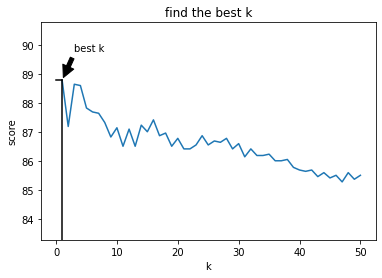

           The best k found: 1,  score = 0.8878760255241568


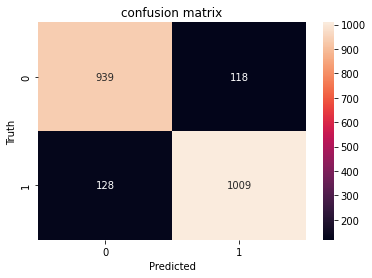

              precision    recall  f1-score   support

       False       0.88      0.89      0.88      1057
        True       0.90      0.89      0.89      1137

    accuracy                           0.89      2194
   macro avg       0.89      0.89      0.89      2194
weighted avg       0.89      0.89      0.89      2194

             !!!!!  split number : 10  !!!!!
     In training: Counter({False: 9880, True: 9870})
     In testing: Counter({True: 1102, False: 1092})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


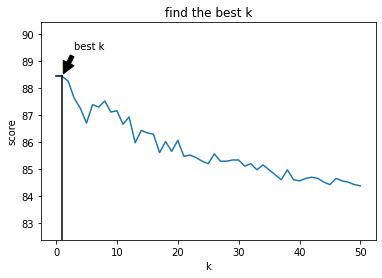

           The best k found: 1,  score = 0.8842297174111212


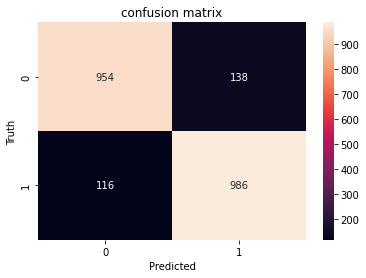

              precision    recall  f1-score   support

       False       0.89      0.87      0.88      1092
        True       0.88      0.89      0.89      1102

    accuracy                           0.88      2194
   macro avg       0.88      0.88      0.88      2194
weighted avg       0.88      0.88      0.88      2194

mean accuracy for this sub_experiment is 0.88
mean recall for this sub_experiment is 0.87
mean precision for this sub_experiment is 0.89
mean f1_score for this sub_experiment is 0.88
------------------------------------------------------------
!!!!!  sub-experiment with KNN model number 3  !!!!!
!!!!!  dataset used is : tweets with cleaning  !!!!!
------------------------------------------------------------
             !!!!!  split number : 1  !!!!!
     In training: Counter({True: 8940, False: 8925})
     In testing: Counter({False: 1000, True: 985})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


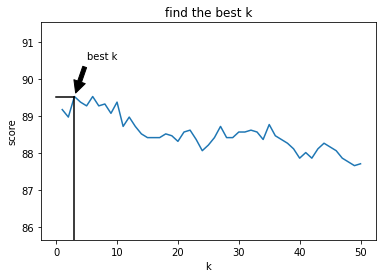

           The best k found: 3,  score = 0.8952141057934508


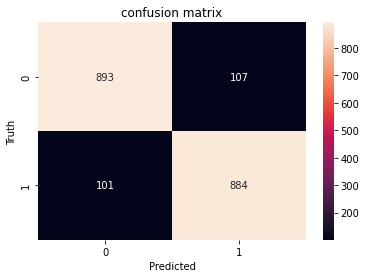

              precision    recall  f1-score   support

       False       0.90      0.89      0.90      1000
        True       0.89      0.90      0.89       985

    accuracy                           0.90      1985
   macro avg       0.90      0.90      0.90      1985
weighted avg       0.90      0.90      0.90      1985

             !!!!!  split number : 2  !!!!!
     In training: Counter({False: 8977, True: 8888})
     In testing: Counter({True: 1037, False: 948})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


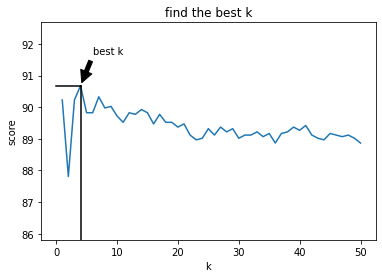

           The best k found: 4,  score = 0.906801007556675


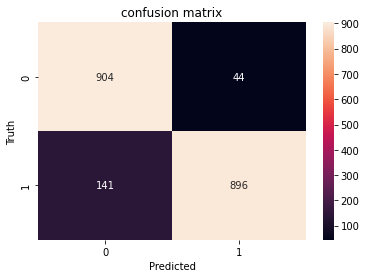

              precision    recall  f1-score   support

       False       0.87      0.95      0.91       948
        True       0.95      0.86      0.91      1037

    accuracy                           0.91      1985
   macro avg       0.91      0.91      0.91      1985
weighted avg       0.91      0.91      0.91      1985

             !!!!!  split number : 3  !!!!!
     In training: Counter({False: 8961, True: 8904})
     In testing: Counter({True: 1021, False: 964})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


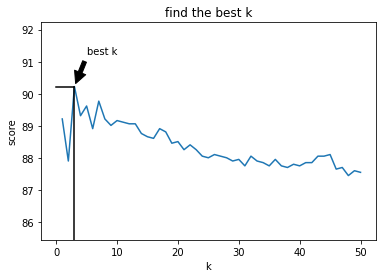

           The best k found: 3,  score = 0.9022670025188917


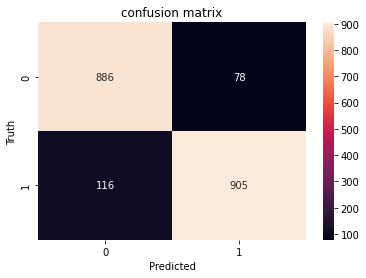

              precision    recall  f1-score   support

       False       0.88      0.92      0.90       964
        True       0.92      0.89      0.90      1021

    accuracy                           0.90      1985
   macro avg       0.90      0.90      0.90      1985
weighted avg       0.90      0.90      0.90      1985

             !!!!!  split number : 4  !!!!!
     In training: Counter({True: 8946, False: 8919})
     In testing: Counter({False: 1006, True: 979})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


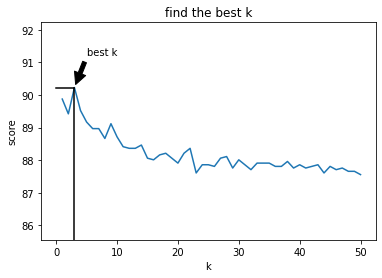

           The best k found: 3,  score = 0.9022670025188917


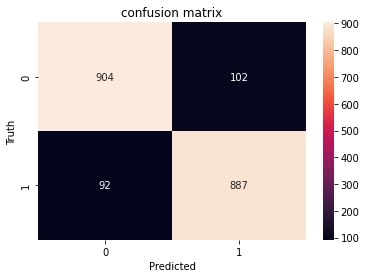

              precision    recall  f1-score   support

       False       0.91      0.90      0.90      1006
        True       0.90      0.91      0.90       979

    accuracy                           0.90      1985
   macro avg       0.90      0.90      0.90      1985
weighted avg       0.90      0.90      0.90      1985

             !!!!!  split number : 5  !!!!!
     In training: Counter({False: 8934, True: 8931})
     In testing: Counter({True: 994, False: 991})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


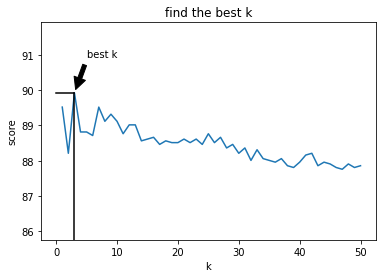

           The best k found: 3,  score = 0.8992443324937027


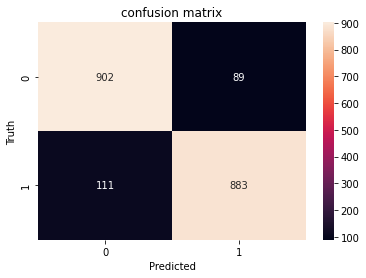

              precision    recall  f1-score   support

       False       0.89      0.91      0.90       991
        True       0.91      0.89      0.90       994

    accuracy                           0.90      1985
   macro avg       0.90      0.90      0.90      1985
weighted avg       0.90      0.90      0.90      1985

             !!!!!  split number : 6  !!!!!
     In training: Counter({True: 8952, False: 8913})
     In testing: Counter({False: 1012, True: 973})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


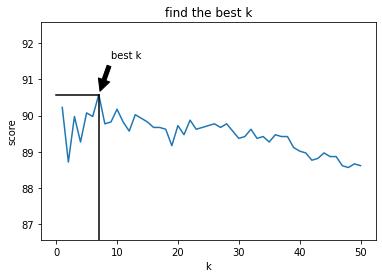

           The best k found: 7,  score = 0.9057934508816121


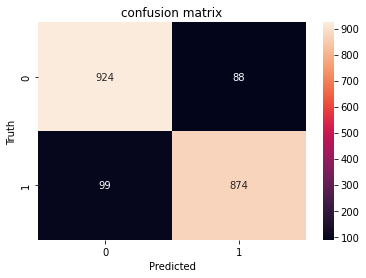

              precision    recall  f1-score   support

       False       0.90      0.91      0.91      1012
        True       0.91      0.90      0.90       973

    accuracy                           0.91      1985
   macro avg       0.91      0.91      0.91      1985
weighted avg       0.91      0.91      0.91      1985

             !!!!!  split number : 7  !!!!!
     In training: Counter({False: 8941, True: 8924})
     In testing: Counter({True: 1001, False: 984})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


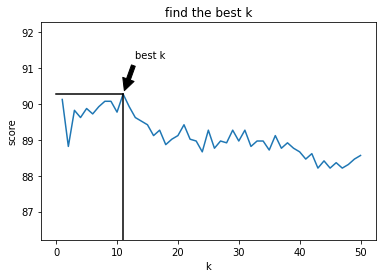

           The best k found: 11,  score = 0.9027707808564231


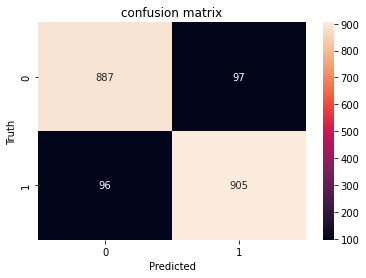

              precision    recall  f1-score   support

       False       0.90      0.90      0.90       984
        True       0.90      0.90      0.90      1001

    accuracy                           0.90      1985
   macro avg       0.90      0.90      0.90      1985
weighted avg       0.90      0.90      0.90      1985

             !!!!!  split number : 8  !!!!!
     In training: Counter({False: 8935, True: 8930})
     In testing: Counter({True: 995, False: 990})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


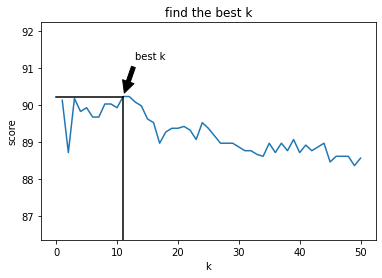

           The best k found: 11,  score = 0.9022670025188917


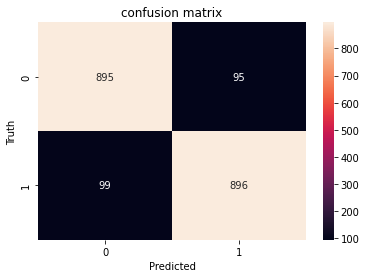

              precision    recall  f1-score   support

       False       0.90      0.90      0.90       990
        True       0.90      0.90      0.90       995

    accuracy                           0.90      1985
   macro avg       0.90      0.90      0.90      1985
weighted avg       0.90      0.90      0.90      1985

             !!!!!  split number : 9  !!!!!
     In training: Counter({True: 8962, False: 8903})
     In testing: Counter({False: 1022, True: 963})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


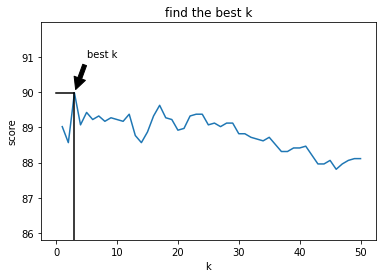

           The best k found: 3,  score = 0.8997481108312343


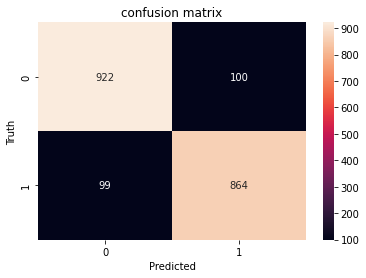

              precision    recall  f1-score   support

       False       0.90      0.90      0.90      1022
        True       0.90      0.90      0.90       963

    accuracy                           0.90      1985
   macro avg       0.90      0.90      0.90      1985
weighted avg       0.90      0.90      0.90      1985

             !!!!!  split number : 10  !!!!!
     In training: Counter({True: 8948, False: 8917})
     In testing: Counter({False: 1008, True: 977})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


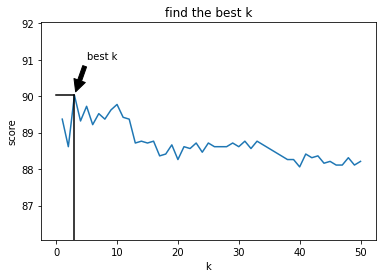

           The best k found: 3,  score = 0.9002518891687658


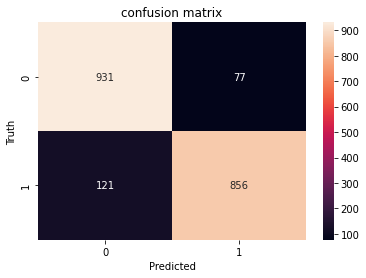

              precision    recall  f1-score   support

       False       0.88      0.92      0.90      1008
        True       0.92      0.88      0.90       977

    accuracy                           0.90      1985
   macro avg       0.90      0.90      0.90      1985
weighted avg       0.90      0.90      0.90      1985

mean accuracy for this sub_experiment is 0.9
mean recall for this sub_experiment is 0.89
mean precision for this sub_experiment is 0.91
mean f1_score for this sub_experiment is 0.9
------------------------------------------------------------
!!!!!  sub-experiment with KNN model number 4  !!!!!
!!!!!  dataset used is : tweets without cleaning  !!!!!
------------------------------------------------------------
             !!!!!  split number : 1  !!!!!
     In training: Counter({True: 8942, False: 8924})
     In testing: Counter({False: 1002, True: 984})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


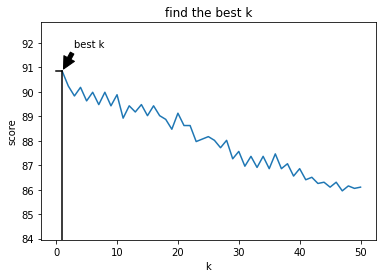

           The best k found: 1,  score = 0.9083585095669687


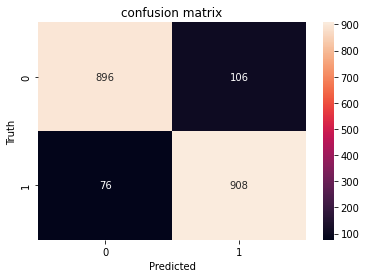

              precision    recall  f1-score   support

       False       0.92      0.89      0.91      1002
        True       0.90      0.92      0.91       984

    accuracy                           0.91      1986
   macro avg       0.91      0.91      0.91      1986
weighted avg       0.91      0.91      0.91      1986

             !!!!!  split number : 2  !!!!!
     In training: Counter({True: 8936, False: 8930})
     In testing: Counter({False: 996, True: 990})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


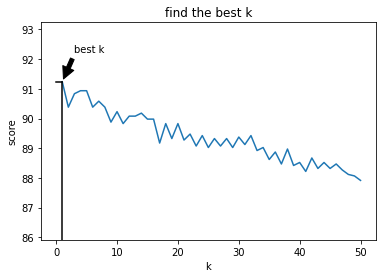

           The best k found: 1,  score = 0.9123867069486404


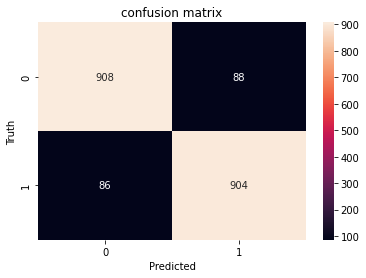

              precision    recall  f1-score   support

       False       0.91      0.91      0.91       996
        True       0.91      0.91      0.91       990

    accuracy                           0.91      1986
   macro avg       0.91      0.91      0.91      1986
weighted avg       0.91      0.91      0.91      1986

             !!!!!  split number : 3  !!!!!
     In training: Counter({False: 8934, True: 8933})
     In testing: Counter({True: 993, False: 992})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


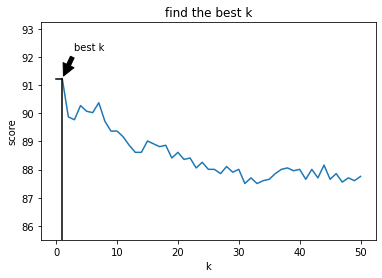

           The best k found: 1,  score = 0.9123425692695214


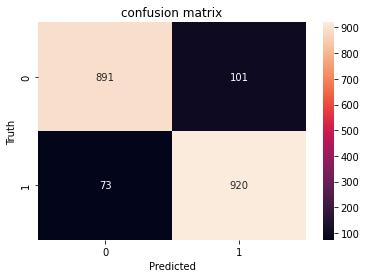

              precision    recall  f1-score   support

       False       0.92      0.90      0.91       992
        True       0.90      0.93      0.91       993

    accuracy                           0.91      1985
   macro avg       0.91      0.91      0.91      1985
weighted avg       0.91      0.91      0.91      1985

             !!!!!  split number : 4  !!!!!
     In training: Counter({False: 8936, True: 8931})
     In testing: Counter({True: 995, False: 990})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


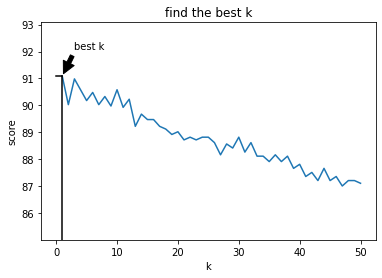

           The best k found: 1,  score = 0.9108312342569269


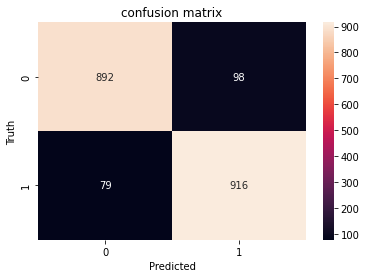

              precision    recall  f1-score   support

       False       0.92      0.90      0.91       990
        True       0.90      0.92      0.91       995

    accuracy                           0.91      1985
   macro avg       0.91      0.91      0.91      1985
weighted avg       0.91      0.91      0.91      1985

             !!!!!  split number : 5  !!!!!
     In training: Counter({True: 8967, False: 8900})
     In testing: Counter({False: 1026, True: 959})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


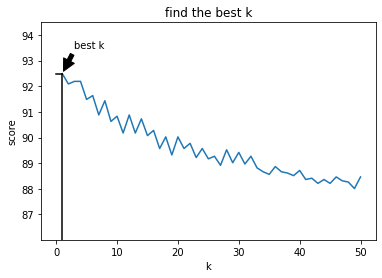

           The best k found: 1,  score = 0.9249370277078086


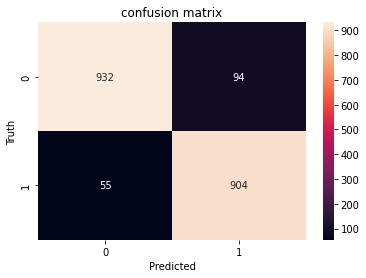

              precision    recall  f1-score   support

       False       0.94      0.91      0.93      1026
        True       0.91      0.94      0.92       959

    accuracy                           0.92      1985
   macro avg       0.93      0.93      0.92      1985
weighted avg       0.93      0.92      0.92      1985

             !!!!!  split number : 6  !!!!!
     In training: Counter({False: 8955, True: 8912})
     In testing: Counter({True: 1014, False: 971})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


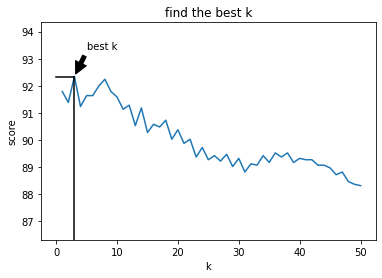

           The best k found: 3,  score = 0.9234256926952141


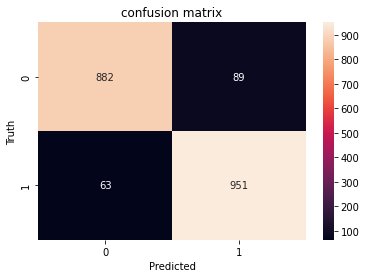

              precision    recall  f1-score   support

       False       0.93      0.91      0.92       971
        True       0.91      0.94      0.93      1014

    accuracy                           0.92      1985
   macro avg       0.92      0.92      0.92      1985
weighted avg       0.92      0.92      0.92      1985

             !!!!!  split number : 7  !!!!!
     In training: Counter({False: 8972, True: 8895})
     In testing: Counter({True: 1031, False: 954})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


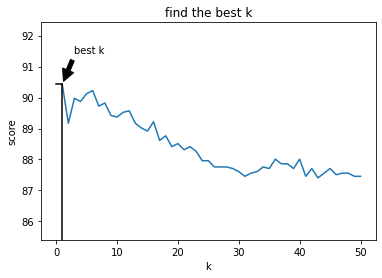

           The best k found: 1,  score = 0.9042821158690176


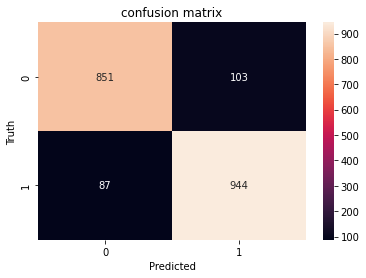

              precision    recall  f1-score   support

       False       0.91      0.89      0.90       954
        True       0.90      0.92      0.91      1031

    accuracy                           0.90      1985
   macro avg       0.90      0.90      0.90      1985
weighted avg       0.90      0.90      0.90      1985

             !!!!!  split number : 8  !!!!!
     In training: Counter({False: 8935, True: 8932})
     In testing: Counter({True: 994, False: 991})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


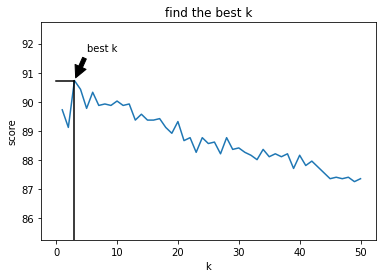

           The best k found: 3,  score = 0.9073047858942066


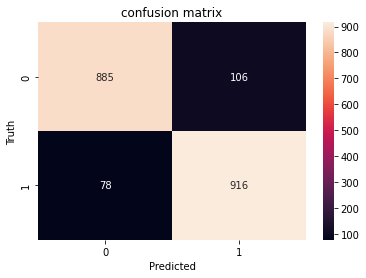

              precision    recall  f1-score   support

       False       0.92      0.89      0.91       991
        True       0.90      0.92      0.91       994

    accuracy                           0.91      1985
   macro avg       0.91      0.91      0.91      1985
weighted avg       0.91      0.91      0.91      1985

             !!!!!  split number : 9  !!!!!
     In training: Counter({True: 8956, False: 8911})
     In testing: Counter({False: 1015, True: 970})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


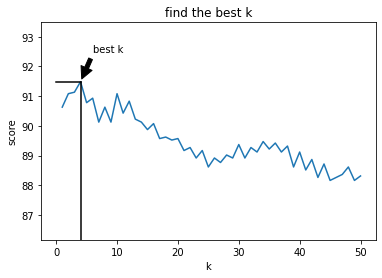

           The best k found: 4,  score = 0.9148614609571788


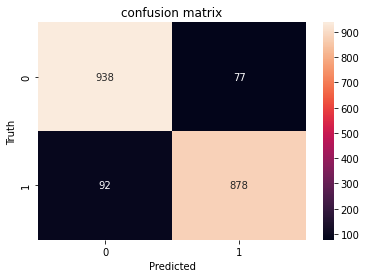

              precision    recall  f1-score   support

       False       0.91      0.92      0.92      1015
        True       0.92      0.91      0.91       970

    accuracy                           0.91      1985
   macro avg       0.92      0.91      0.91      1985
weighted avg       0.91      0.91      0.91      1985

             !!!!!  split number : 10  !!!!!
     In training: Counter({False: 8937, True: 8930})
     In testing: Counter({True: 996, False: 989})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


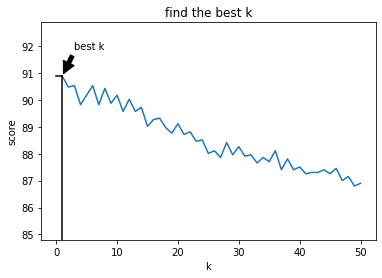

           The best k found: 1,  score = 0.908816120906801


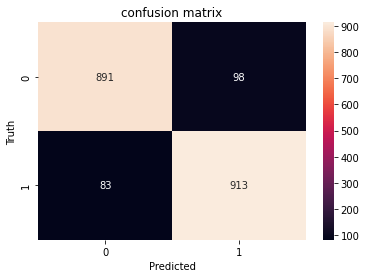

              precision    recall  f1-score   support

       False       0.91      0.90      0.91       989
        True       0.90      0.92      0.91       996

    accuracy                           0.91      1985
   macro avg       0.91      0.91      0.91      1985
weighted avg       0.91      0.91      0.91      1985

mean accuracy for this sub_experiment is 0.91
mean recall for this sub_experiment is 0.92
mean precision for this sub_experiment is 0.91
mean f1_score for this sub_experiment is 0.91
---------------------------------------------------------
                   End of Experiment
---------------------------------------------------------
mean accuracy for this experiment is 0.89
mean recall for this experiment is 0.89
mean precision for this experiment is 0.9
mean f1_score for this experiment is 0.89


In [8]:
sub_experiment_count = 1
accuracy  = 0
recall    = 0
f1_score  = 0
precision = 0
for dataSet in dataSet_array:
  dataSet_text = dataSet['text']
  dataSet_label = dataSet['label']
  sub_accuracy  = 0
  sub_recall    = 0
  sub_f1_score  = 0
  sub_precision = 0
  print('------------------------------------------------------------')
  #some output
  if sub_experiment_count == 1:
    print('!!!!!  sub-experiment with KNN model number 1  !!!!!')
    print('!!!!!  dataset used is : article and tweets with cleaning  !!!!!')
  elif sub_experiment_count == 2:
    print('!!!!!  sub-experiment with KNN model number 2  !!!!!')
    print('!!!!!  dataset used is : article and tweets without cleaning  !!!!!')
  elif sub_experiment_count == 3:
    print('!!!!!  sub-experiment with KNN model number 3  !!!!!')
    print('!!!!!  dataset used is : tweets with cleaning  !!!!!')
  elif sub_experiment_count == 4:
    print('!!!!!  sub-experiment with KNN model number 4  !!!!!')
    print('!!!!!  dataset used is : tweets without cleaning  !!!!!')
  print('------------------------------------------------------------')

  #cross validation counter
  split = 1
  kfold = KFold(n_splits=10, shuffle=True)
  
  #encode the texts
  sentences_encode = model.encode(dataSet_text)
  
  #cross validation loop
  for train, test in kfold.split(sentences_encode, dataSet_label):
  
    #convert the vectors to np array
    training_padded = np.array(sentences_encode[train])
    training_labels = np.array(dataSet_label[train])
    testing_padded  = np.array(sentences_encode[test])
    testing_labels  = np.array(dataSet_label[test])

    #some output
    print('             !!!!!  split number : '+ str(split) + '  !!!!!')
    print('     ' + f'In training: {Counter(training_labels)}')
    print('     ' + f'In testing: {Counter(testing_labels)}')

    #find best k
    k = find_the_best_k(training_padded, training_labels, testing_padded, testing_labels)
    #creat KNN model 
    knn = KNeighborsClassifier(n_neighbors=k)
    #fit the model
    knn.fit(training_padded, training_labels)
    #get the model score
    score = knn.score(testing_padded, testing_labels)
    #get the predicted lable
    lable_predicted = knn.predict(testing_padded)

    #some output
    print('           The best k found: '+str(k)+',  score = '+str(score))
    
    #create and show the confusion matrix
    cm = metrics.confusion_matrix(testing_labels, lable_predicted)
    sn.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title('confusion matrix')
    plt.show()
    
    #show the classification report 
    print(metrics.classification_report(testing_labels, lable_predicted))

    #add the new metrics result from the new cross val. to the old  metrics result from the old cross val.
    sub_accuracy  = sub_accuracy + metrics.accuracy_score(testing_labels, lable_predicted)
    sub_recall    = sub_recall + metrics.recall_score(testing_labels, lable_predicted)
    sub_f1_score  = sub_f1_score + metrics.f1_score(testing_labels, lable_predicted)
    sub_precision = sub_precision + metrics.precision_score(testing_labels, lable_predicted)
    
    #indexing
    split = split + 1
  #compute the mean of the using metrics in the cross val.
  sub_accuracy  = sub_accuracy / 10
  sub_recall    = sub_recall / 10
  sub_f1_score  = sub_f1_score / 10
  sub_precision = sub_precision / 10

  #some output
  print("mean accuracy for this sub_experiment is " + str(round(sub_accuracy, 2)))
  print("mean recall for this sub_experiment is " + str(round(sub_recall, 2)))
  print("mean precision for this sub_experiment is " + str(round(sub_precision, 2)))
  print("mean f1_score for this sub_experiment is " + str(round(sub_f1_score, 2)))

  #add the new metrics result from the new sub experiment to the old  metrics result from the old sub experiments
  accuracy  = accuracy + sub_accuracy
  recall    = recall + sub_recall
  precision = precision + sub_precision
  f1_score  = f1_score + sub_f1_score

  #indexing
  sub_experiment_count = sub_experiment_count + 1

#compute the mean of the using metrics for the 4 sub experiments.
accuracy  = accuracy / 4
recall    = recall / 4
f1_score  = f1_score / 4
precision = precision / 4


#some output
print('---------------------------------------------------------')
print('                   End of Experiment')
print('---------------------------------------------------------')

print("mean accuracy for this experiment is " + str(round(accuracy, 2)))
print("mean recall for this experiment is " + str(round(recall, 2)))
print("mean precision for this experiment is " + str(round(precision, 2)))
print("mean f1_score for this experiment is " + str(round(f1_score, 2)))